**17 CATEGORY FLOWER DATASET - TRANSFER LEARNING USING VGG16 PRE-TRAINED MODEL**

**FINAL RESULT:**

Pre-trained models	Top-1 accuracy	Top-5 accuracy
VGG16 – Transfer learning	89%	98%
VGG16 – Fine tuning	91%	98%
InceptionV3 – Transfer learning	91%	99%
InceptionV3 – Fine tuning	96%	99.5%


Notice how InceptionV3 outperforms the other Deep Neural Net architectures. This could be due to the presence of 9 network-in-a-network modules, codenamed as Inception modules, which applies different convolutional filter sizes in parallel to an input volume and concatenates the result at output.


17 category flower dataset has  all the 1360 images listed in one single folder named *.jpg. The FLOWERS17 dataset has 1360 images of 17 flower species classes with 80 images per class.

To build our training dataset, we need to create a master folder named dataset, inside which we need to create two more folders namely train and validation. Inside train folder, we need to create 17 folders corresponding to the flower species labels.

To automate this task, I used Java script which separates every 80 Images into its respective categories and further divides the data RANDOMLY into train and validation sets in the ratio 80:20 (i.e. 80% of train data and 20% validation data).

We are using VGG 16 model. VGG is a convolutional neural network model for image recognition proposed by the Visual Geometry Group in the University of Oxford, where VGG16 refers to a VGG model with 16 weight layers. Below are few parameters details of the model:

- model.include_top (False): Whether or not to include the output layers for the model. We have passed False becuase we our using custom Dense layers as output layer.

- weights (‘imagenet‘): What weights to load. We are loading pre-trained weights because we don't want to train the model from scratch.

- input_shape: The size of images that the model is expected to take. Input layer takes an image in the size of (224 x 224 x 3)

It should be noted that the last layer has a shape of 7 x 7 x 512.. Max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model.

In [2]:
# Load the pre-trained model

from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
vgg_conv.summary()


58892288/58889256 [==============================] - 22s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_poo

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Lists the content of your google drive
!ls "/content/drive/My Drive"

 6285_03_multiple_regression.pptx  'Class 1_Solution.txt'	    Query1.xlsx
'6285_04_kNN_method(1).pptx'	   'Colab Notebooks'		    Query.xlsx
'Access Data.accdb'		   'Fall 2015'			    train
 Assignment_2			   'MSBA COURSE'		    validation
 Assignment_2.zip		    paypal_products_services.pptx


In [5]:
# Extract Features

train_dir = 'drive/My Drive/train/'
validation_dir = 'drive/My Drive/validation/'

print(train_dir)
print(validation_dir)

nTrain = 1088
nVal = 272


drive/My Drive/train/
drive/My Drive/validation/


In [6]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255, featurewise_std_normalization=True)

batch_size = 20


train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,17))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break


train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))



1.12.0-rc1


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:657: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1088 images belonging to 17 classes.


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:807: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [69]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,17))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,   
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 272 images belonging to 17 classes.


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:807: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [85]:
# Create your own model

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))

# Train the model

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))



Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - 2s 2ms/step - loss: 2.7378 - acc: 0.1388 - val_loss: 2.3052 - val_acc: 0.3750
Epoch 2/100
1088/1088 [==============================] - 1s 848us/step - loss: 2.1499 - acc: 0.3539 - val_loss: 1.9109 - val_acc: 0.5221
Epoch 3/100
1088/1088 [==============================] - 1s 875us/step - loss: 1.7693 - acc: 0.5175 - val_loss: 1.6266 - val_acc: 0.6250
Epoch 4/100
1088/1088 [==============================] - 1s 880us/step - loss: 1.4562 - acc: 0.6232 - val_loss: 1.3951 - val_acc: 0.6618
Epoch 5/100
1088/1088 [==============================] - 1s 853us/step - loss: 1.2522 - acc: 0.6618 - val_loss: 1.2343 - val_acc: 0.7206
Epoch 6/100
1088/1088 [==============================] - 1s 887us/step - loss: 1.0258 - acc: 0.7537 - val_loss: 1.1227 - val_acc: 0.7463
Epoch 7/100
1088/1088 [==============================] - 1s 853us/step - loss: 0.8917 - acc: 0.7858 - val_loss: 1.0135 - val_acc: 0.7

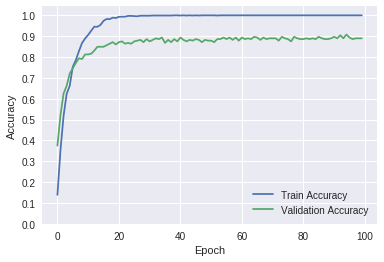

In [86]:
# Plot

import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Validation Accuracy')
 plt.legend()
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

In [87]:
# Check Performance

fnames = validation_generator.filenames
 
ground_truth = validation_generator.classes
 
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features)
 
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 30/272


Original label:Bluebell, Prediction :Buttercup, confidence : 0.784


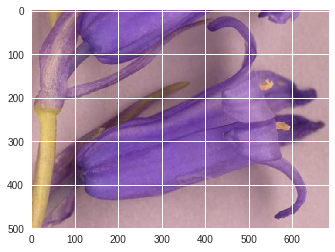

Original label:Colts'Foot, Prediction :Dandelion, confidence : 0.884


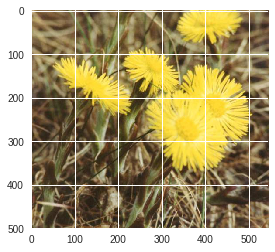

Original label:Colts'Foot, Prediction :Crocus, confidence : 0.625


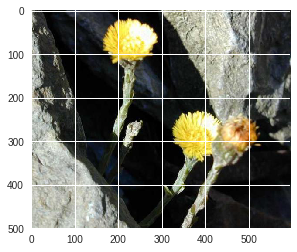

Original label:Colts'Foot, Prediction :Bluebell, confidence : 0.392


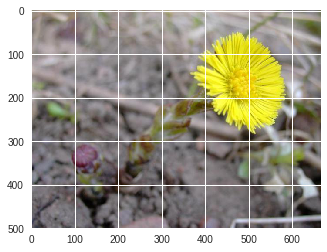

Original label:Colts'Foot, Prediction :Buttercup, confidence : 0.226


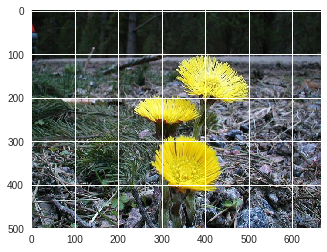

Original label:Colts'Foot, Prediction :Pansy, confidence : 0.453


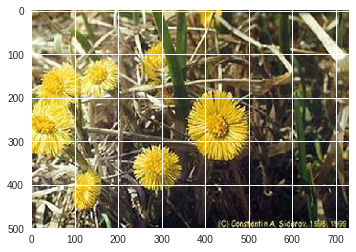

Original label:Colts'Foot, Prediction :Crocus, confidence : 0.596


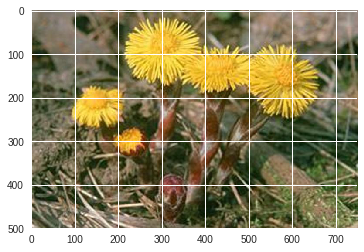

Original label:Colts'Foot, Prediction :Tulip, confidence : 0.607


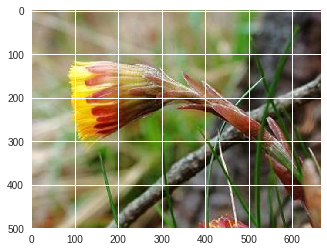

Original label:Colts'Foot, Prediction :Dandelion, confidence : 0.943


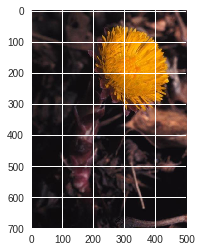

Original label:Colts'Foot, Prediction :Tulip, confidence : 0.498


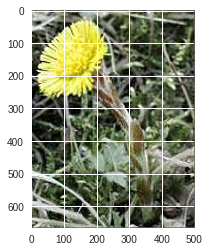

Original label:Cowslip, Prediction :Tulip, confidence : 0.999


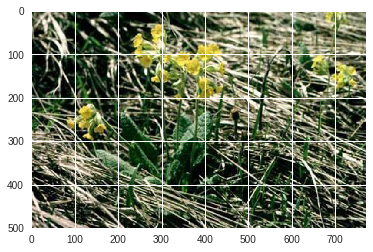

Original label:Cowslip, Prediction :Bluebell, confidence : 0.699


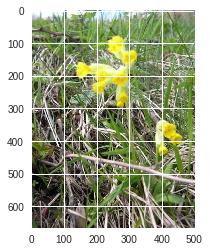

Original label:Cowslip, Prediction :Lily Valley, confidence : 0.745


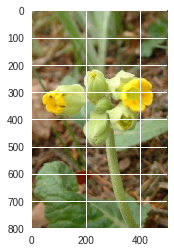

Original label:Crocus, Prediction :Daffodil, confidence : 0.808


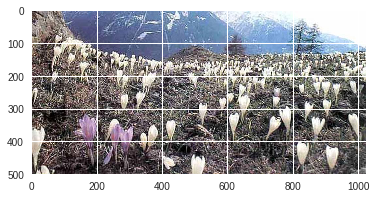

Original label:Crocus, Prediction :Bluebell, confidence : 0.706


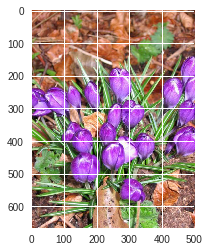

Original label:Fritillary, Prediction :Snowdrop, confidence : 0.660


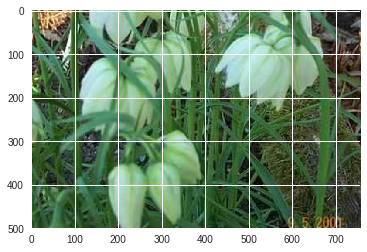

Original label:Fritillary, Prediction :Crocus, confidence : 0.964


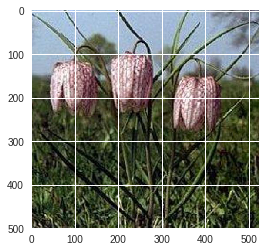

Original label:Lily Valley, Prediction :Iris, confidence : 0.481


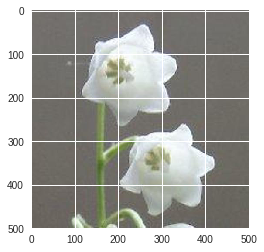

Original label:Lily Valley, Prediction :Buttercup, confidence : 0.630


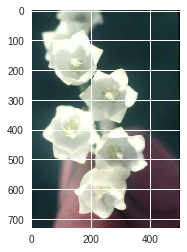

Original label:Snowdrop, Prediction :Lily Valley, confidence : 0.803


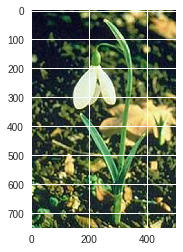

Original label:Snowdrop, Prediction :Tigerlily, confidence : 0.849


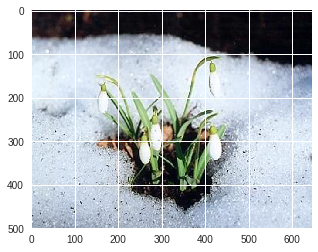

Original label:Sunflower, Prediction :Cowslip, confidence : 0.418


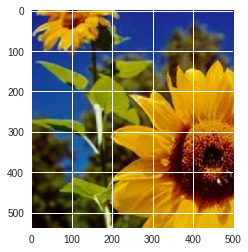

Original label:Tigerlily, Prediction :Snowdrop, confidence : 0.275


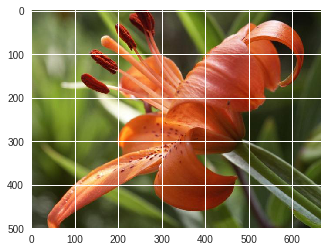

Original label:Tigerlily, Prediction :Cowslip, confidence : 0.591


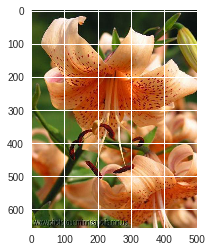

Original label:Tigerlily, Prediction :Fritillary, confidence : 0.856


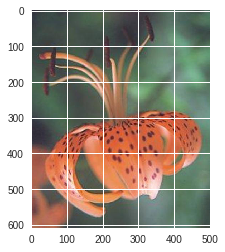

Original label:Tigerlily, Prediction :Bluebell, confidence : 0.765


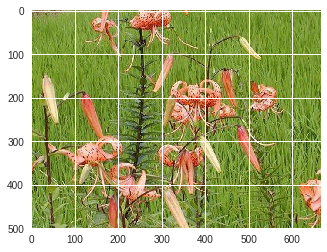

Original label:Tigerlily, Prediction :Bluebell, confidence : 0.388


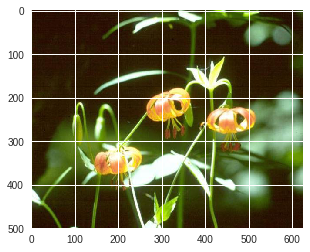

Original label:Tulip, Prediction :Cowslip, confidence : 0.455


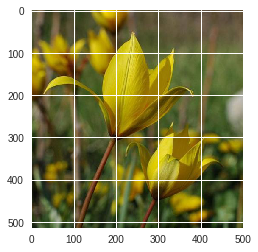

Original label:Tulip, Prediction :Cowslip, confidence : 0.912


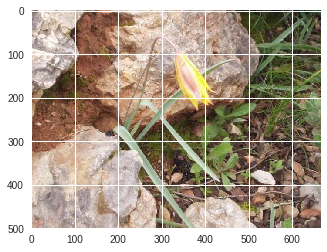

Original label:Windflower, Prediction :Tigerlily, confidence : 0.696


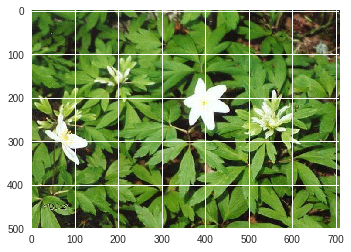

In [88]:
from keras.preprocessing import image

for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
     
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        prob[errors[i]][pred_class]))
     
    original = image.load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.imshow(original)
    plt.show()

In [93]:
# TOP 1 ACCURACY

from keras import models
from keras import layers
from keras import optimizers
from keras.metrics import top_k_categorical_accuracy

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))

# Top 1 accuracy used as Metrics 

def top_1_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=1) 

model.compile(optimizer= optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=[top_1_categorical_accuracy])

history = model.fit(train_features,
                    train_labels,
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))


Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - 3s 2ms/step - loss: 2.8038 - top_1_categorical_accuracy: 0.1278 - val_loss: 2.2971 - val_top_1_categorical_accuracy: 0.3971
Epoch 2/100
1088/1088 [==============================] - 1s 907us/step - loss: 2.1601 - top_1_categorical_accuracy: 0.3465 - val_loss: 1.8984 - val_top_1_categorical_accuracy: 0.5294
Epoch 3/100
1088/1088 [==============================] - 1s 889us/step - loss: 1.7425 - top_1_categorical_accuracy: 0.5009 - val_loss: 1.5867 - val_top_1_categorical_accuracy: 0.6287
Epoch 4/100
1088/1088 [==============================] - 1s 903us/step - loss: 1.4008 - top_1_categorical_accuracy: 0.6406 - val_loss: 1.3599 - val_top_1_categorical_accuracy: 0.7279
Epoch 5/100
1088/1088 [==============================] - 1s 899us/step - loss: 1.2134 - top_1_categorical_accuracy: 0.6829 - val_loss: 1.2335 - val_top_1_categorical_accuracy: 0.7096
Epoch 6/100
1088/1088 [=================

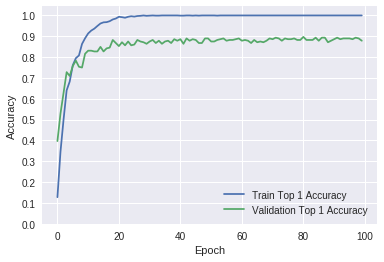

In [94]:
# TOP 1 ACCURACY PLOT

import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['top_1_categorical_accuracy']),
 label='Train Top 1 Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_top_1_categorical_accuracy']),
 label = 'Validation Top 1 Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

In [89]:
# TOP 5 ACCURACY

from keras import models
from keras import layers
from keras import optimizers
from keras.metrics import top_k_categorical_accuracy

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))

# Top 5 accuracy used as Metrics 

def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5) 

model.compile(optimizer= optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=[top_5_accuracy])

history = model.fit(train_features,
                    train_labels,
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))




Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 [==============================] - 2s 2ms/step - loss: 2.7122 - top_5_accuracy: 0.4899 - val_loss: 2.2994 - val_top_5_accuracy: 0.7537
Epoch 2/100
1088/1088 [==============================] - 1s 935us/step - loss: 2.1100 - top_5_accuracy: 0.7831 - val_loss: 1.8698 - val_top_5_accuracy: 0.8824
Epoch 3/100
1088/1088 [==============================] - 1s 946us/step - loss: 1.7539 - top_5_accuracy: 0.8529 - val_loss: 1.5925 - val_top_5_accuracy: 0.8971
Epoch 4/100
1088/1088 [==============================] - 1s 953us/step - loss: 1.4023 - top_5_accuracy: 0.9108 - val_loss: 1.3774 - val_top_5_accuracy: 0.9301
Epoch 5/100
1088/1088 [==============================] - 1s 927us/step - loss: 1.1695 - top_5_accuracy: 0.9476 - val_loss: 1.2003 - val_top_5_accuracy: 0.9338
Epoch 6/100
1088/1088 [==============================] - 1s 948us/step - loss: 1.0185 - top_5_accuracy: 0.9586 - val_loss: 1.1002 - val_top_5_accuracy: 0.9375
E

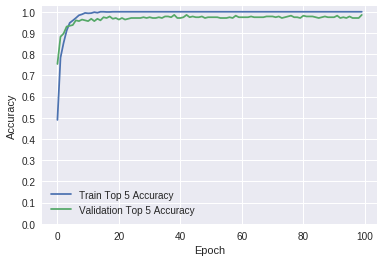

In [90]:
# TOP 5 ACCURACY PLOT

import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(history.epoch, np.array(history.history['top_5_accuracy']),
 label='Train Top 5 Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_top_5_accuracy']),
 label = 'Validation Top 5 Accuracy')
 plt.legend()
 #plt.ylim([0, 1.5])
 plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])    
    
plot_history(history)

Top 1 Accuracy - 89%
Top 5 Accuracy - 98%

**JAVA CODE USED TO SPLIT DATA INTO TRAIN AND TEST RANDOMLY**


package com.coremetrics.orion.tools.data;

 

import java.io.File;

import java.io.FileInputStream;

import java.io.FileNotFoundException;

import java.io.FileOutputStream;

import java.io.IOException;

import java.io.InputStream;

import java.io.OutputStream;

 

public class CreateFolders {

    public static void main(String[] args)

    {   

        File srcFolder = new File("/Users/Amrutha/Desktop/Amrutha/deep_learning/jpg");

 

        

        //make sure source exists

        if(!srcFolder.exists()){

 

           System.out.println("Directory does not exist.");

           //just exit

           System.exit(0);

 

        }else{

 

           try{

               String files[] = srcFolder.list();

               int i = 1;

               copyFolder(srcFolder, files);   

           }catch(IOException e){

            e.printStackTrace();

            //error, just exit

                System.exit(0);

           }

        }

        

        System.out.println("Done");

    }

    

    private static void copyFile(File src, File dest) throws IOException {

        //if file, then copy it

        //Use bytes stream to support all file types

        InputStream in = new FileInputStream(src);

            OutputStream out = new FileOutputStream(dest); 

                         

            byte[] buffer = new byte[1024];

        

            int length;

            //copy the file content in bytes 

            while ((length = in.read(buffer)) > 0){

               out.write(buffer, 0, length);

            }

 

            in.close();

            out.close();

            System.out.println("File copied from " + src + " to " + dest);        

    }

    

    public static void copyFolder(File src, String files[])

        throws IOException{

        

        if(src.isDirectory()){

            int dirCount = 1;   

            String dirString = "";

            int fileC = 0;

           while(true) {

                if ((fileC%80) == 0) {

                    dirString = "/Users/Amrutha/Desktop/Amrutha/deep_learning/"+"category_"+dirCount;

                    dirCount++;

                }

                if (dirCount == 19) {

                    break;

                }

                File destFolder = new File(dirString); 

                

                if(!destFolder.exists()){

                    destFolder.mkdir();

                    System.out.println("Directory copied from " 

                                   + src + "  to " + destFolder);

                 }

                String s = String.format("%04d", fileC+1);                 

                //File srcFile = new File(src, file);

                File srcFile = new File(src, "image_"+s+".jpg");

                File destFile = new File(destFolder, "image_"+s+".jpg");

                

                copyFile(srcFile,destFile);

                fileC++;

            }

        }

    }

}

 

 

 

package com.coremetrics.orion.tools.data;

 

import java.io.File;

import java.io.FileInputStream;

import java.io.FileOutputStream;

import java.io.IOException;

import java.io.InputStream;

import java.io.OutputStream;

 

public class RandomPickFiles {

    public static void main(String[] args)

    {   

        File srcFolder = new File("/Users/Amrutha/Desktop/Amrutha/deep_learning/jpg");

 

        

        //make sure source exists

        if(!srcFolder.exists()){

 

           System.out.println("Directory does not exist.");

           //just exit

           System.exit(0);

 

        }else{

 

           try{

               String files[] = srcFolder.list();

               int i = 1;

               copyFolder();   

           }catch(IOException e){

            e.printStackTrace();

            //error, just exit

                System.exit(0);

           }

        }

        

        System.out.println("Done");

    }

    

    private static void copyFile(File src, File dest) throws IOException {

        //if file, then copy it

        //Use bytes stream to support all file types

        InputStream in = new FileInputStream(src);

            OutputStream out = new FileOutputStream(dest); 

                         

            byte[] buffer = new byte[1024];

        

            int length;

            //copy the file content in bytes 

            while ((length = in.read(buffer)) > 0){

               out.write(buffer, 0, length);

            }

 

            in.close();

            out.close();

            System.out.println("File copied from " + src + " to " + dest);        

    }

    

    public static void copyFolder()

        throws IOException{

        for (int dirCount = 1; dirCount <= 17; dirCount++) {

            

            String srcString = "/Users/Amrutha/Desktop/Amrutha/deep_learning/deep_learning_assignment_2/"

                    + ""+"category_"+dirCount;

            File srcFolder = new File(srcString);

            String files[] = srcFolder.list();

            

            int fileC = 1;

            

            String dirString = "/Users/Amrutha/Desktop/Amrutha/deep_learning/deep_learning_assignment_2/"

                    + ""+"category_"+dirCount+"_training";

            

            File destFolder = new File(dirString); 

            

            if(!destFolder.exists()){

                destFolder.mkdir();

             }       

            

            for (String file : files) {

                

                File srcFile = new File(srcFolder, file);

                File destFile = new File(destFolder, file);

                

                copyFile(srcFile,destFile);    

                

                if ((fileC%64) == 0) {

                    dirString = "/Users/Amrutha/Desktop/Amrutha/deep_learning/deep_learning_assignment_2/"

                            + ""+"category_"+dirCount+"_testing";

                    

                    destFolder = new File(dirString); 

                    

                    if(!destFolder.exists()){

                        destFolder.mkdir();

                     }                      

                }

                fileC++;

            }

        }

    }

}

